######What are 2's?  A lot of images get misclassifed as 2's
Consider a classifer that recognizes 6,11,15,19,20,21 and groups everything else as other

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
import tensorflow as tf
from tensorflow import keras

In [2]:
X_train=np.load('drive/MyDrive/X_train_strat.npy')

In [3]:
y_train=np.load('drive/MyDrive/y_train_strat.npy')

In [4]:
X_val=np.load('drive/MyDrive/X_val_strat.npy')

In [5]:
y_val=np.load('drive/MyDrive/y_val_strat.npy')

##### Load model 78%

In [6]:
test=keras.models.load_model('drive/MyDrive/CNN5Conv78Accuracy')

##### Make Predictions

In [7]:
predict_y=test.predict(X_val)
y_preds=np.argmax(predict_y, axis=1)

In [8]:
# Turn one hot array into integers
y_val_1d=np.argmax(y_val, axis=1)
y_val_1d[2], y_preds[2]

(2, 8)

##### TensorFlow Confusion Matrix

In [9]:
#confusion=tf.math.confusion_matrix(labels=y_val_1d, predictions=y_preds)

In [ ]:
#print(confusion)

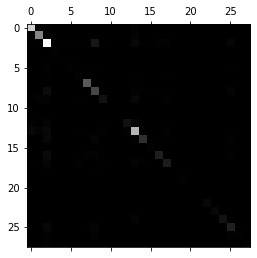

In [10]:
#plt.matshow(confusion, cmap=plt.cm.gray)

##### SKLearn Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix

In [6]:
skconf=confusion_matrix(y_val_1d, y_preds)


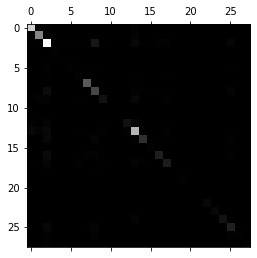

In [23]:
plt.matshow(skconf, cmap=plt.cm.gray)

In [24]:
row_sums=skconf.sum(axis=1, keepdims=True)
mistake_conf=skconf/row_sums

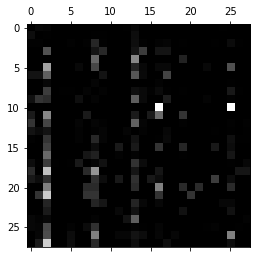

In [60]:
np.fill_diagonal(mistake_conf, 0)
plt.matshow(mistake_conf, cmap=plt.cm.gray)
plt.show()

## 2's are the most common species and many other species get confused for 2's. many images were misclassified as 2's
## there were only 2 10's in the validation set and they were both classified incorrectly, low number of training images for 10's
## many images were also misclassified as 13's, which is the 3rd most common species in validation set
## 0's are second most common and have a high accuracy rate

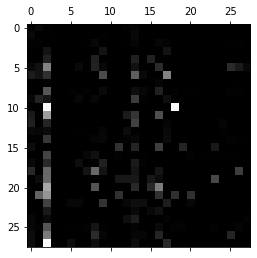

In [15]:
#### 84% model
np.fill_diagonal(mistake_conf, 0)
plt.matshow(mistake_conf, cmap=plt.cm.gray)
plt.show()

##### Best classified species
High Precision(accuracy of positive predictions: 0,1,2,3,7,9,13,14,16,17,23,24,25

High False positives(misclassified as): 2,13,16

High Missed Positives: 6,11,15,19,20,21

In [33]:
from collections import Counter
Counter(y_val_1d.tolist())

Counter({0: 1207,
         1: 783,
         2: 1740,
         3: 25,
         4: 15,
         5: 57,
         6: 53,
         7: 512,
         8: 547,
         9: 213,
         10: 2,
         11: 19,
         12: 184,
         13: 1199,
         14: 392,
         15: 40,
         16: 276,
         17: 262,
         18: 24,
         19: 42,
         20: 12,
         21: 10,
         22: 68,
         23: 59,
         24: 141,
         25: 274,
         26: 80,
         27: 37})

#### Load model 84%

In [7]:
model84=keras.models.load_model('drive/MyDrive/CNN6Conv5Drop3X3pool_84%ValAcc88%train')

#####Make Predictions

In [9]:
predict_y=model84.predict(X_val)
y_preds=np.argmax(predict_y, axis=1)

In [10]:
# Turn one hot array into integers
y_val_1d=np.argmax(y_val, axis=1)
y_val_1d[2], y_preds[2]

(2, 2)

##### SKlearn confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
conf84=confusion_matrix(y_val_1d, y_preds)


In [13]:
row_sums=conf84.sum(axis=1, keepdims=True)
mistake_conf=conf84/row_sums

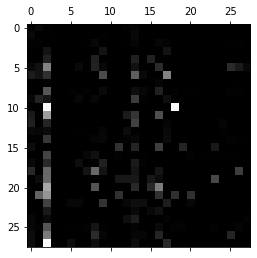

In [14]:
np.fill_diagonal(mistake_conf, 0)
plt.matshow(mistake_conf, cmap=plt.cm.gray)
plt.show()

#### Load other Model 84%

In [16]:
model84_2=keras.models.load_model('drive/MyDrive/CNNSpeciesAcc0.9133val0.8493')

In [17]:
predict_y=model84_2.predict(X_val)
y_preds=np.argmax(predict_y, axis=1)

In [18]:
# Turn one hot array into integers
y_val_1d=np.argmax(y_val, axis=1)
y_val_1d[2], y_preds[2]

(2, 2)

In [19]:
conf84_2=confusion_matrix(y_val_1d, y_preds)

In [20]:
row_sums=conf84_2.sum(axis=1, keepdims=True)
mistake_conf=conf84_2/row_sums

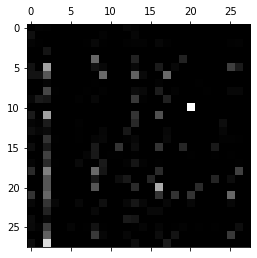

In [21]:
np.fill_diagonal(mistake_conf, 0)
plt.matshow(mistake_conf, cmap=plt.cm.gray)
plt.show()

### All 3 models appear to be making the same mistakes